In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
from scanpy_helpers.annotation import AnnotationHelper
import scvi
import warnings
import numpy as np
from nxfvars import nxfvars

warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
sc.set_figure_params(figsize=(5, 5))

In [4]:
ah = AnnotationHelper()

In [21]:
input_dir = nxfvars.get("input_dir", "../../data/20_integrate_scrnaseq_data/27_annotate_cell_types_coarse_umap/")
main_adata = nxfvars.get("main_adata", "../../data/20_integrate_scrnaseq_data/26_annotate_cell_types_coarse/artifacts/adata_cell_type_coarse.h5ad")
artifact_dir = nxfvars.get("artifact_dir", "/home/sturm/Downloads")

In [22]:
adata = sc.read_h5ad(main_adata)

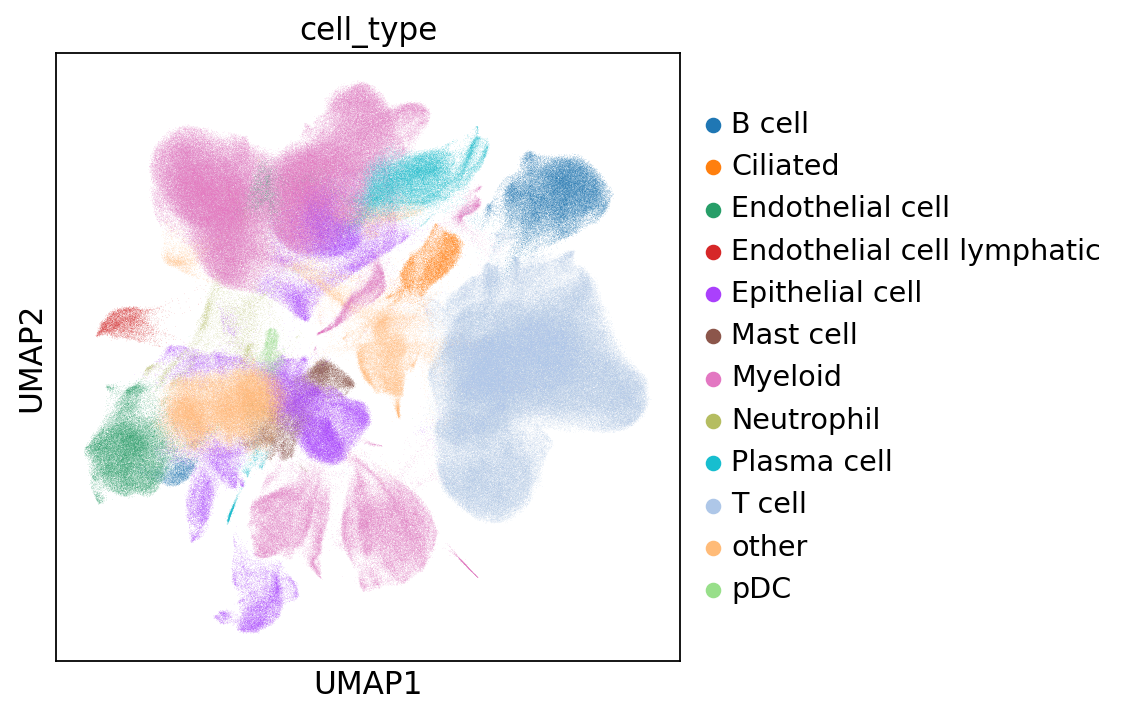

In [23]:
sc.pl.umap(adata, color="cell_type")

## T cell subclustering

In [24]:
adata_t = sc.read_h5ad(f"{input_dir}/adata_t_cell.umap_leiden.h5ad")

Dividing


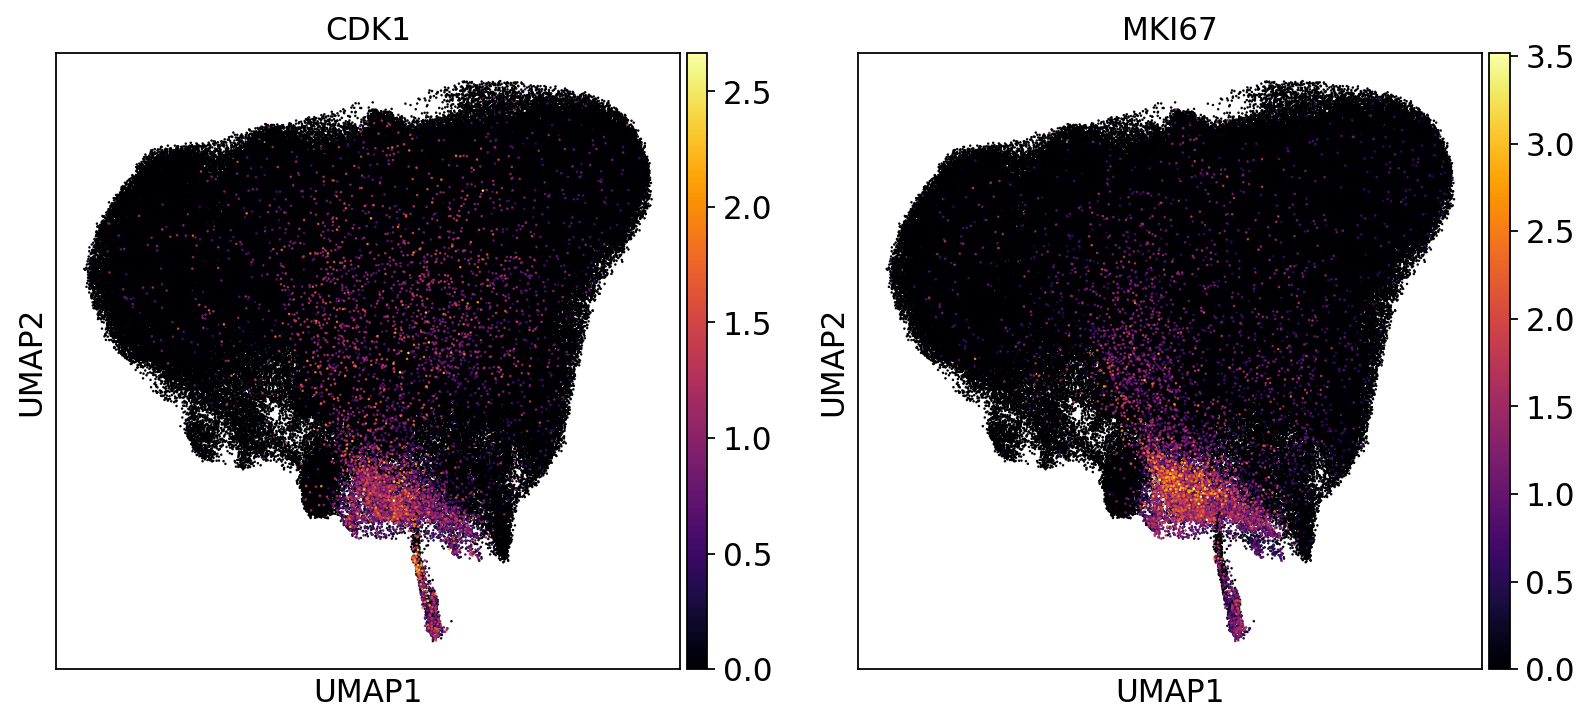

NK cell


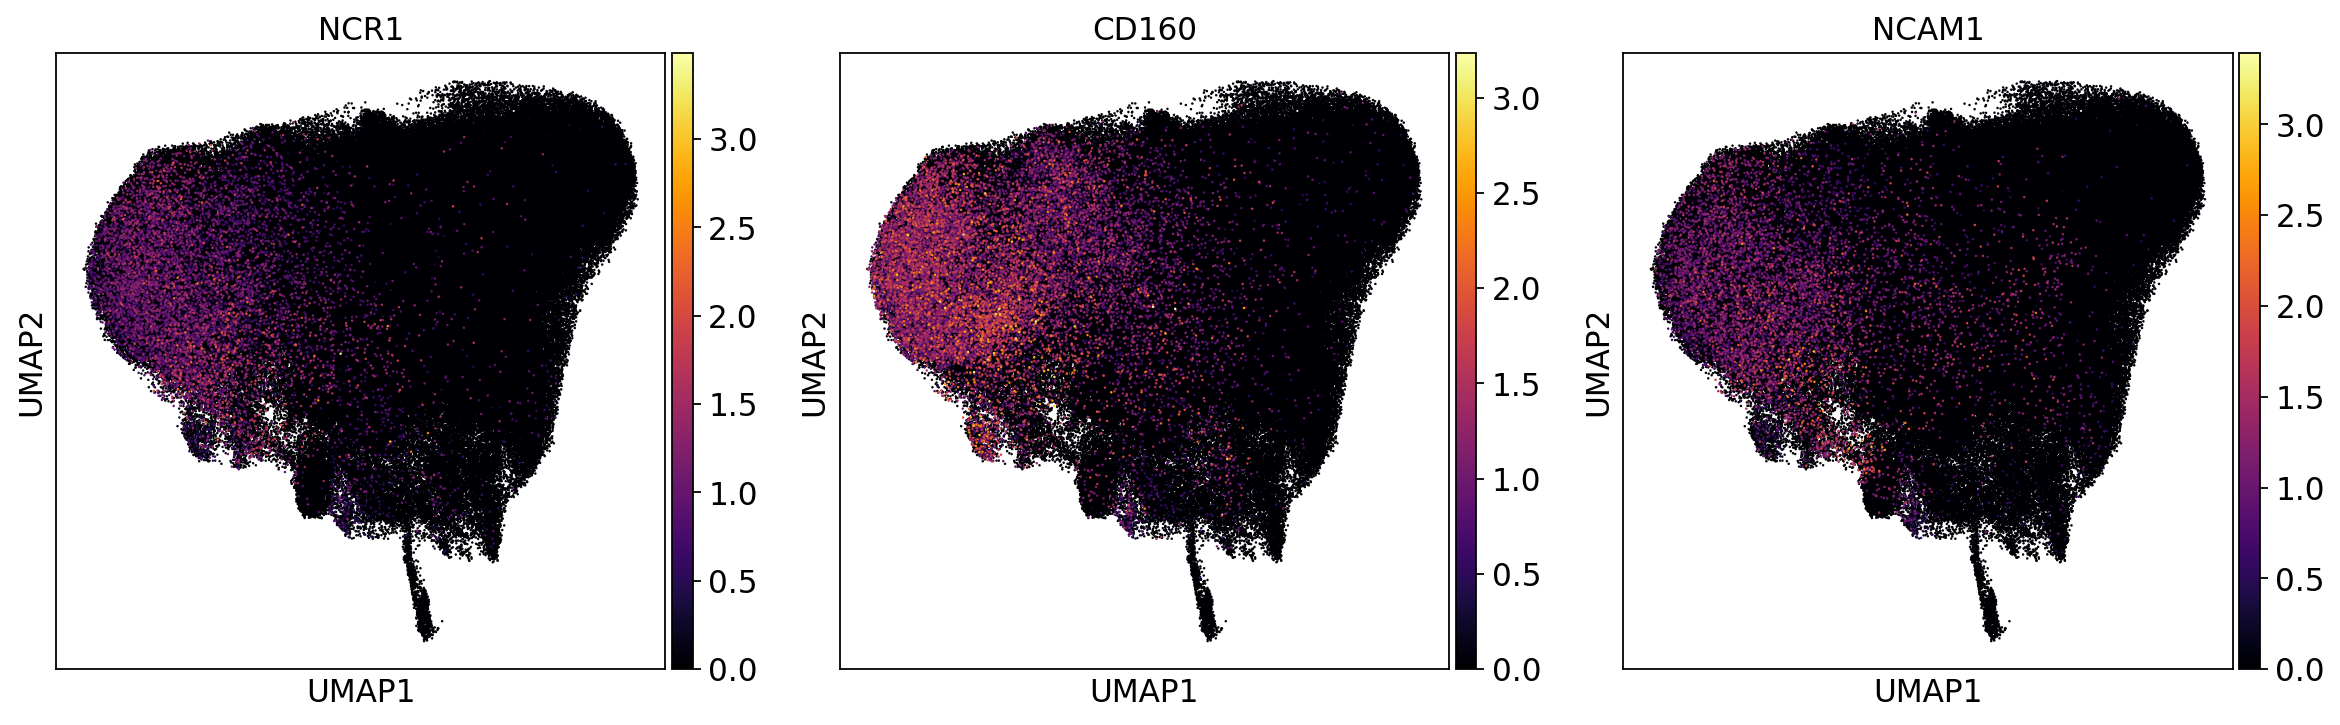

T cell


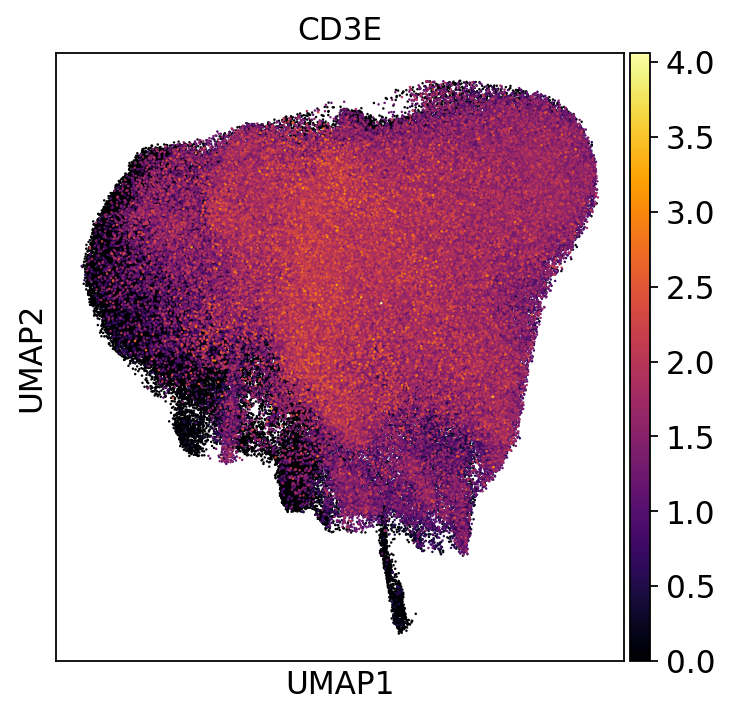

T cell CD4


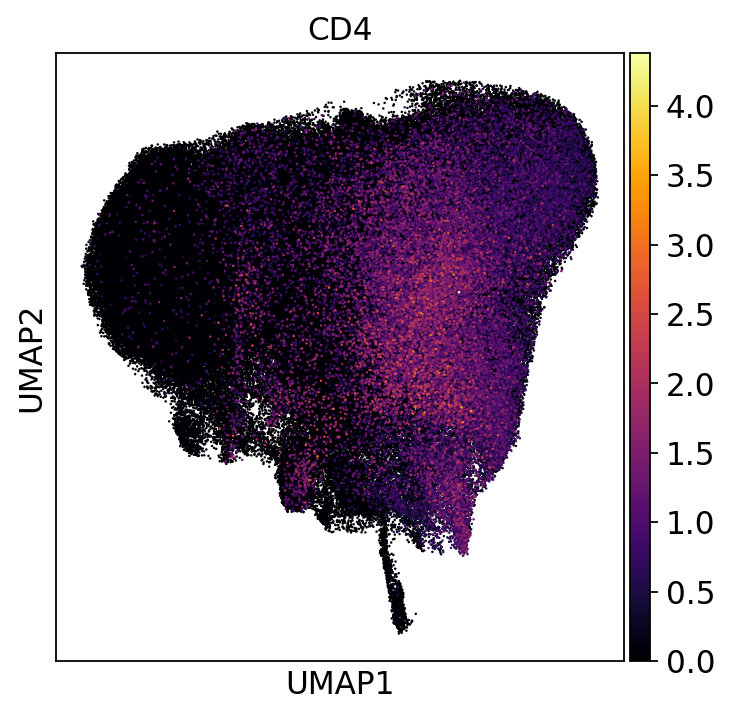

T cell CD8


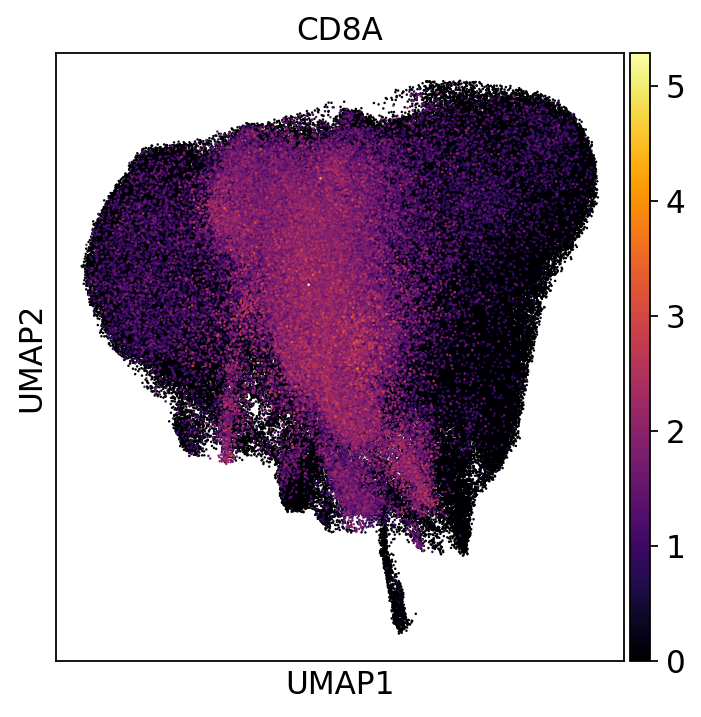

T cell cytotoxic


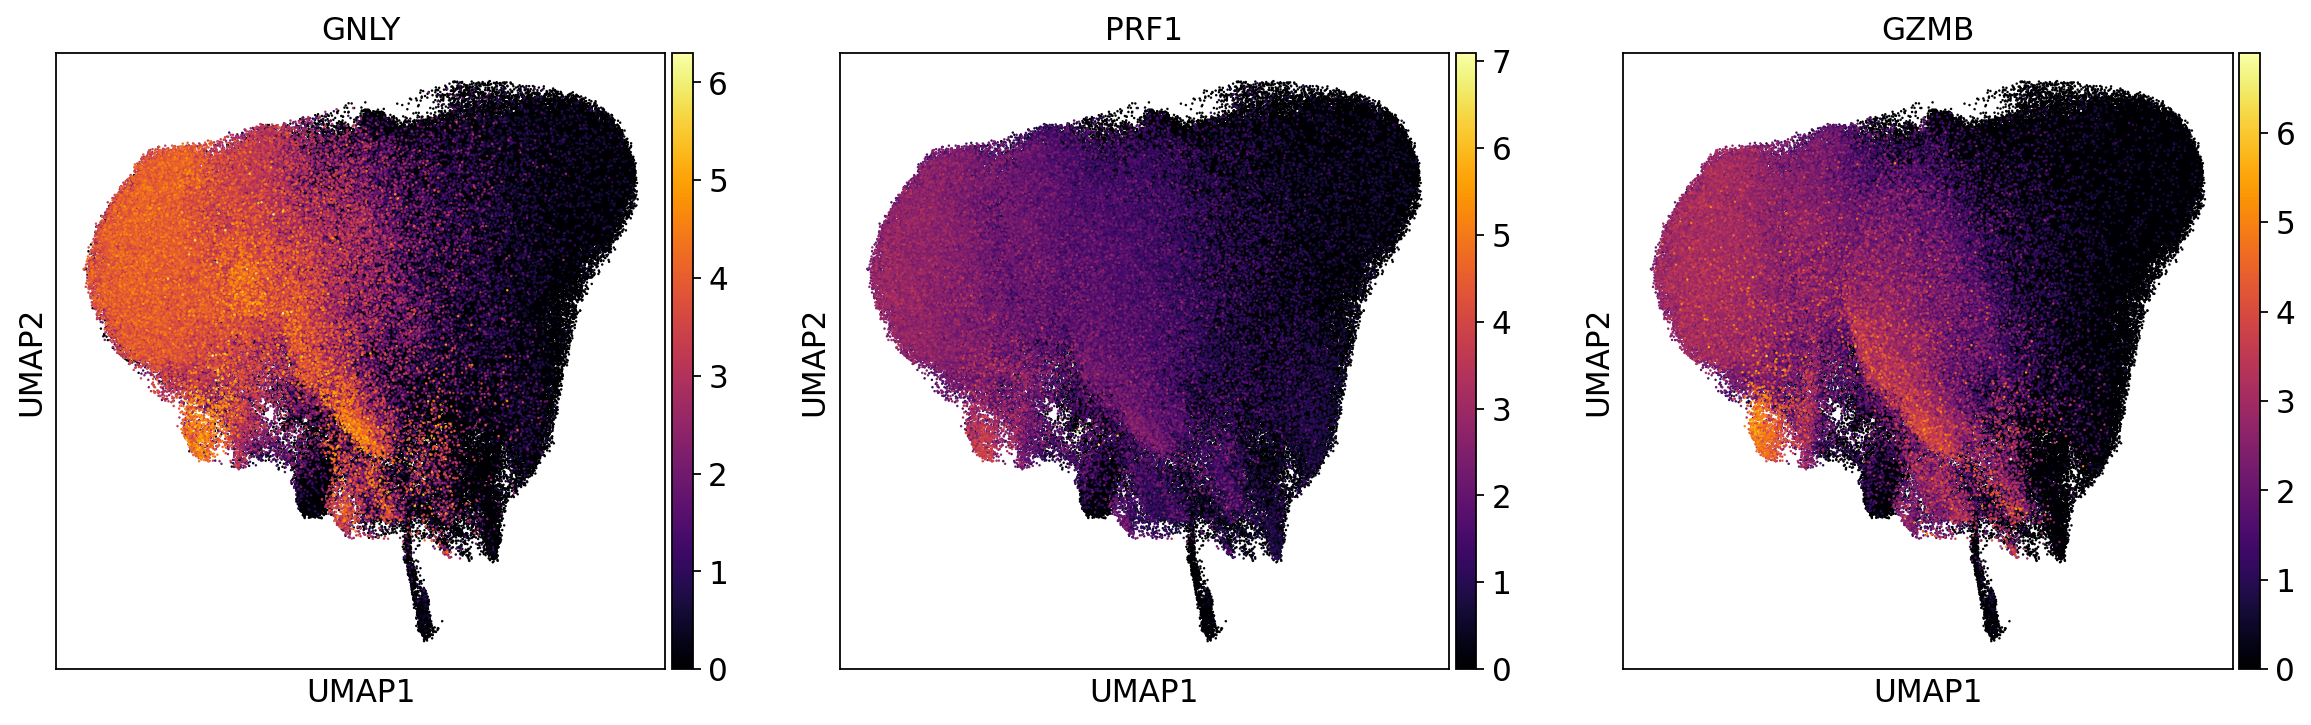

T cell regulatory


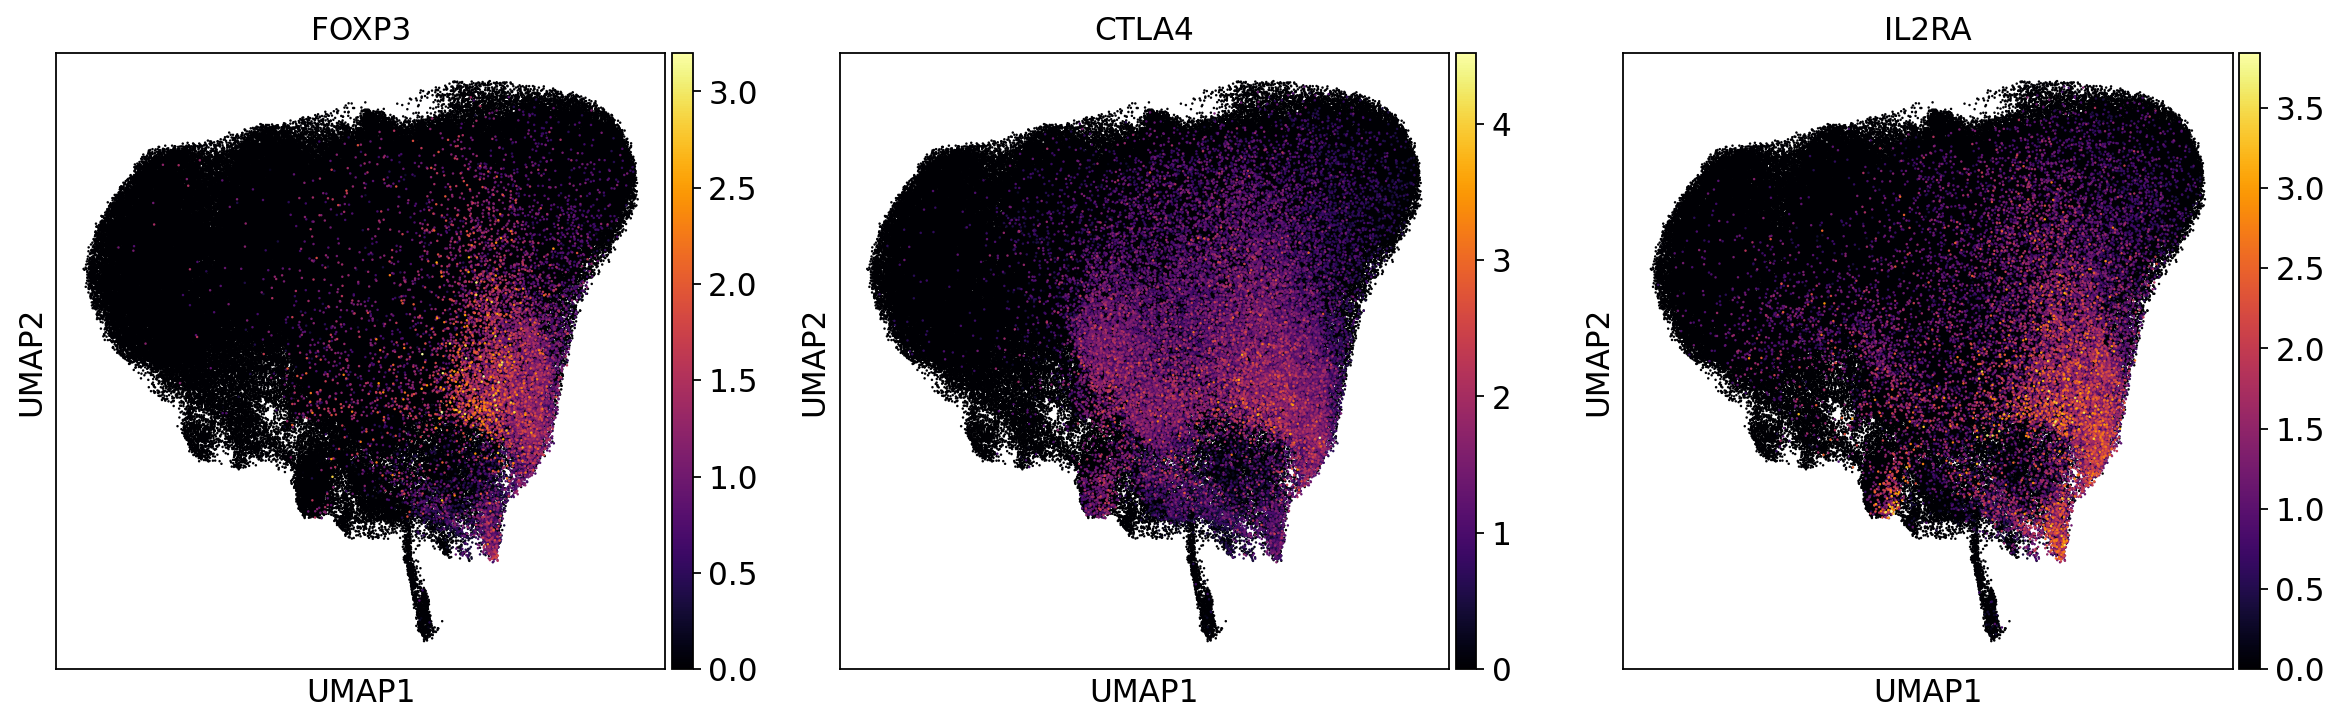

In [25]:
ah.plot_umap(adata_t, filter_cell_type=["T cell", "NK", "Div"], cmap="inferno", size=5)

Marker MIR205HG for Basal not in adata.var


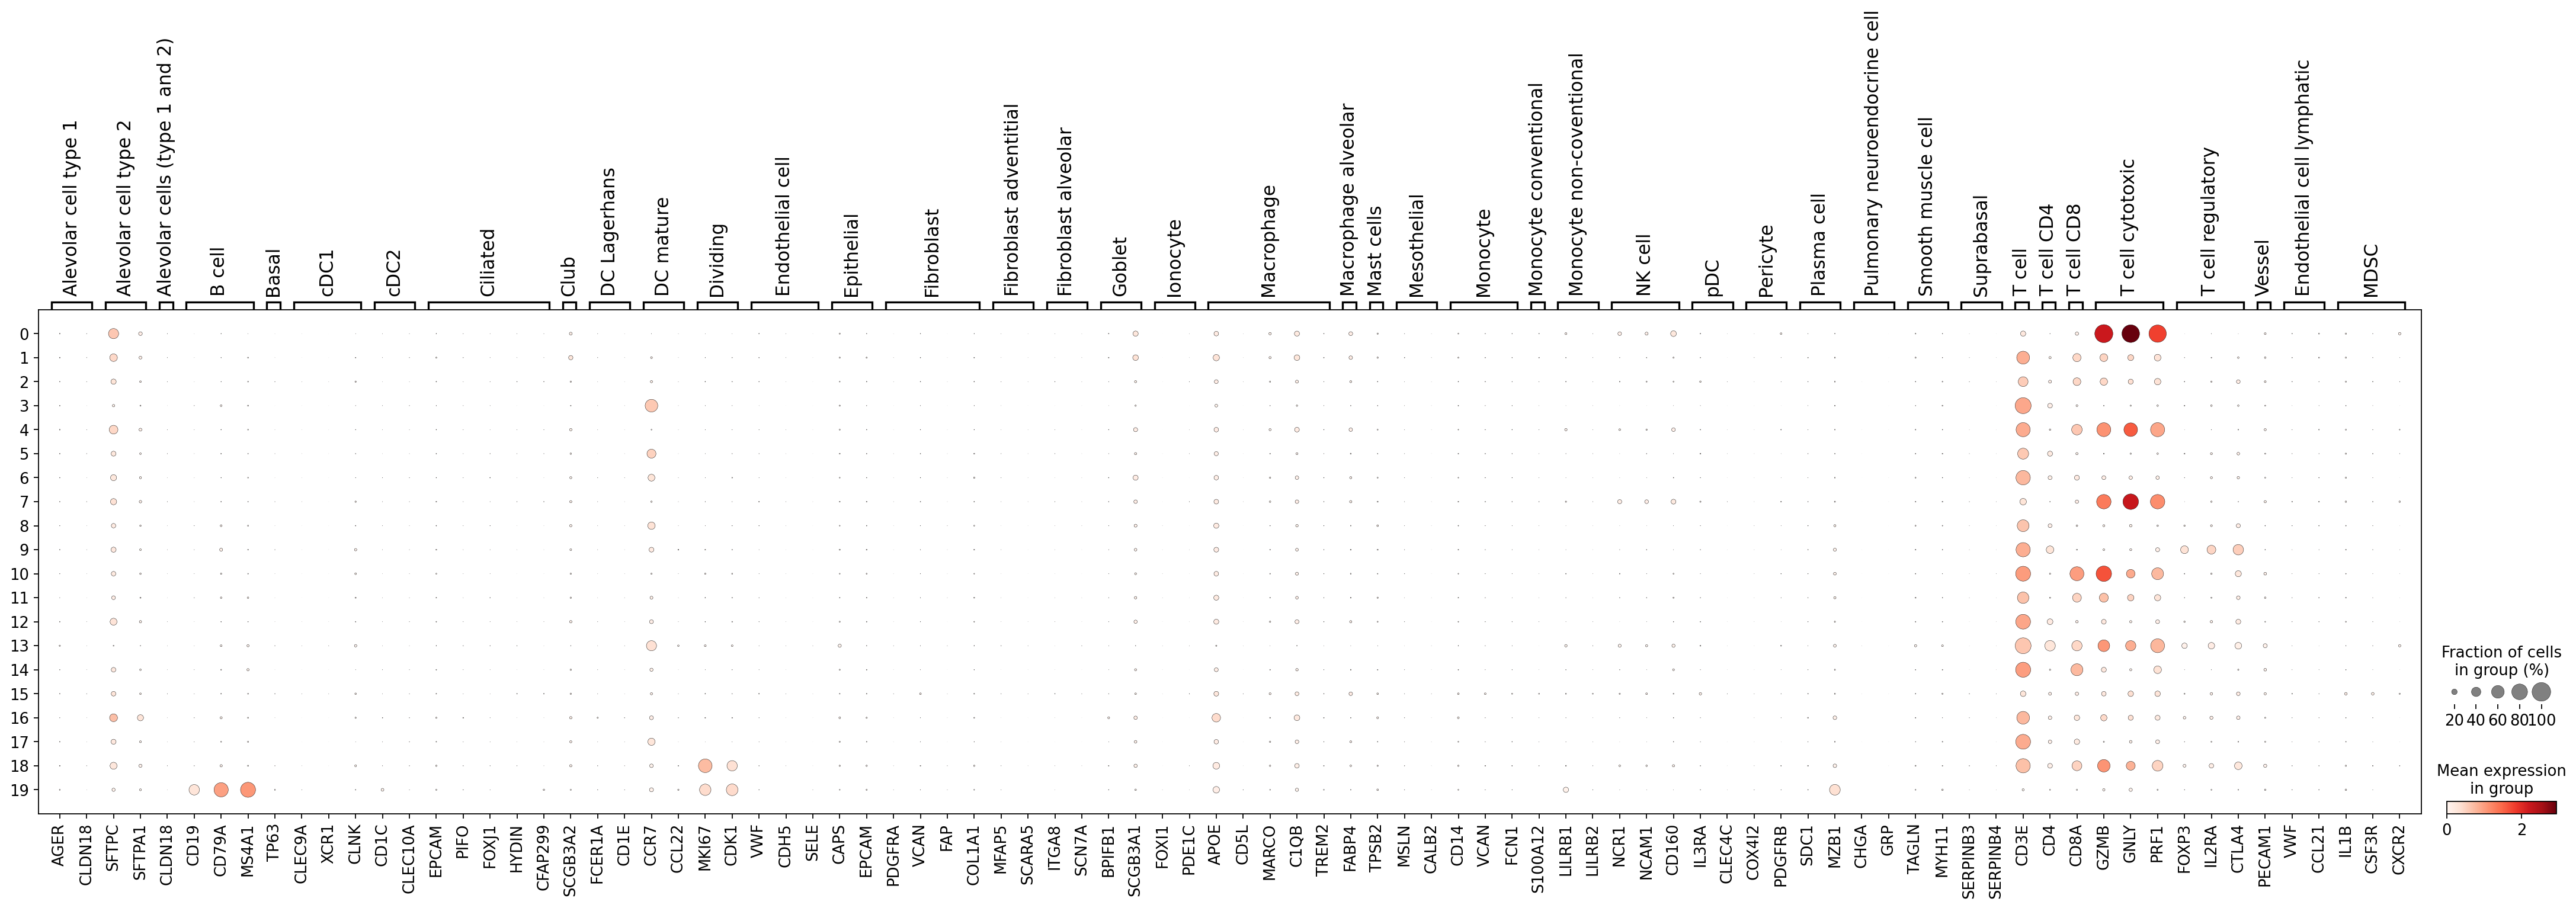

In [26]:
ah.plot_dotplot(adata_t, groupby="leiden_1.00")

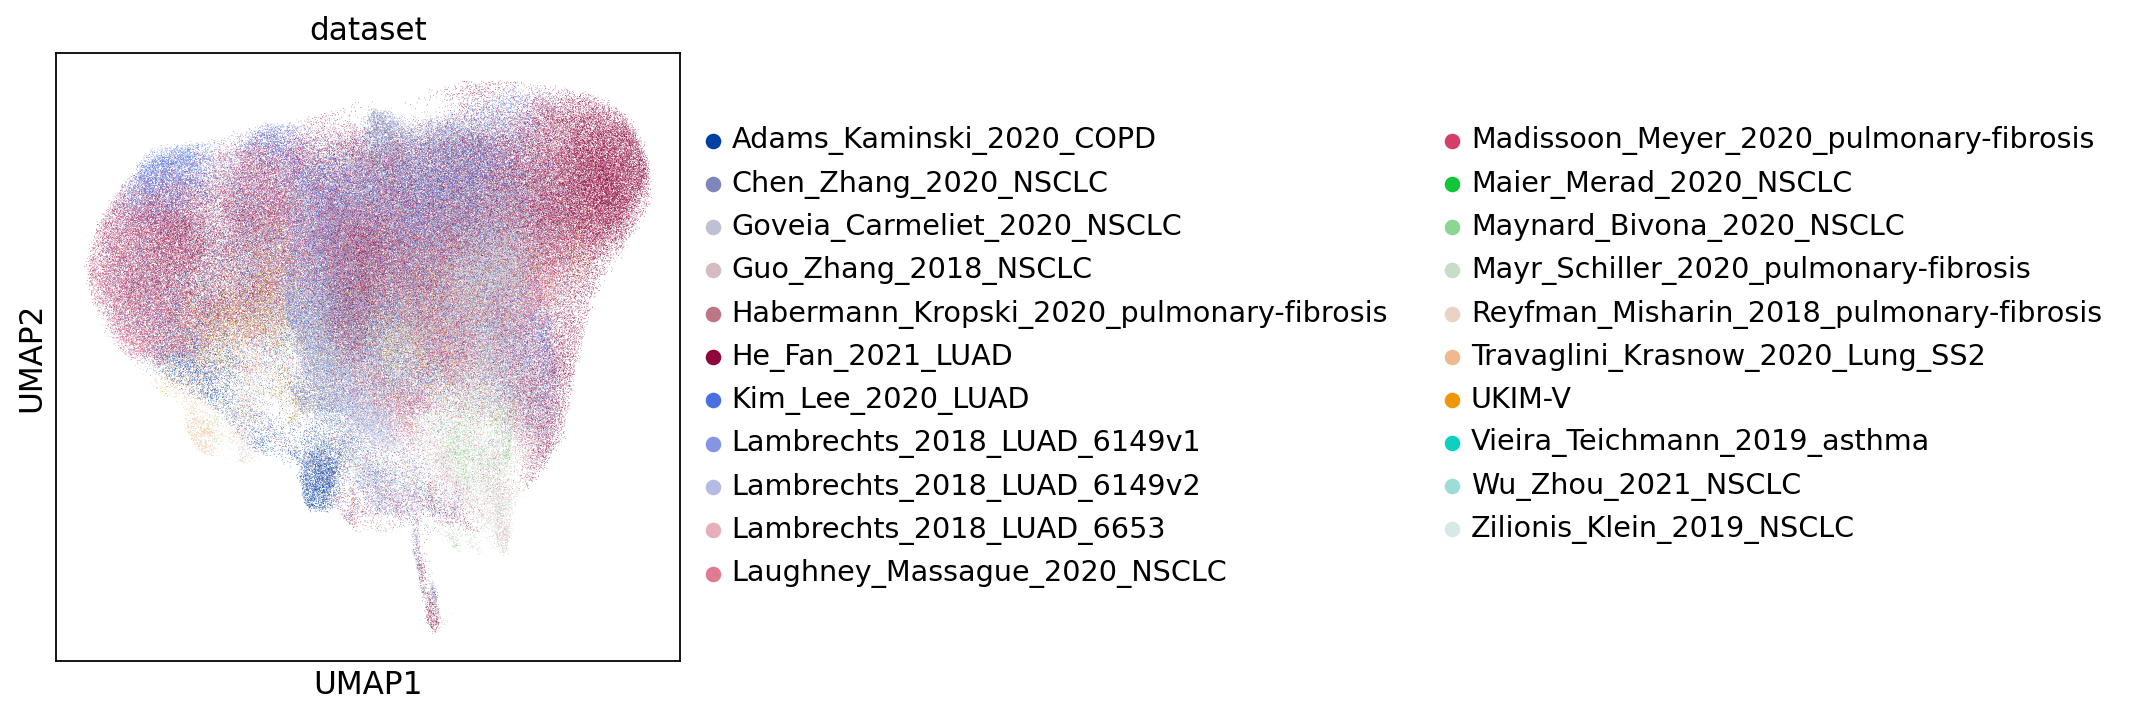

In [27]:
sc.pl.umap(adata_t, color="dataset")

In [29]:
adata_t[adata_t.obs["leiden_1.00"] == "13", :].obs["dataset"].value_counts()

Guo_Zhang_2018_NSCLC                         6147
Maynard_Bivona_2020_NSCLC                    3146
Travaglini_Krasnow_2020_Lung_SS2             1235
He_Fan_2021_LUAD                               68
Laughney_Massague_2020_NSCLC                   63
Lambrechts_2018_LUAD_6149v2                    56
Madissoon_Meyer_2020_pulmonary-fibrosis        54
UKIM-V                                         47
Habermann_Kropski_2020_pulmonary-fibrosis      17
Chen_Zhang_2020_NSCLC                          16
Lambrechts_2018_LUAD_6149v1                     7
Adams_Kaminski_2020_COPD                        3
Mayr_Schiller_2020_pulmonary-fibrosis           3
Wu_Zhou_2021_NSCLC                              2
Lambrechts_2018_LUAD_6653                       2
Kim_Lee_2020_LUAD                               1
Zilionis_Klein_2019_NSCLC                       1
Name: dataset, dtype: int64

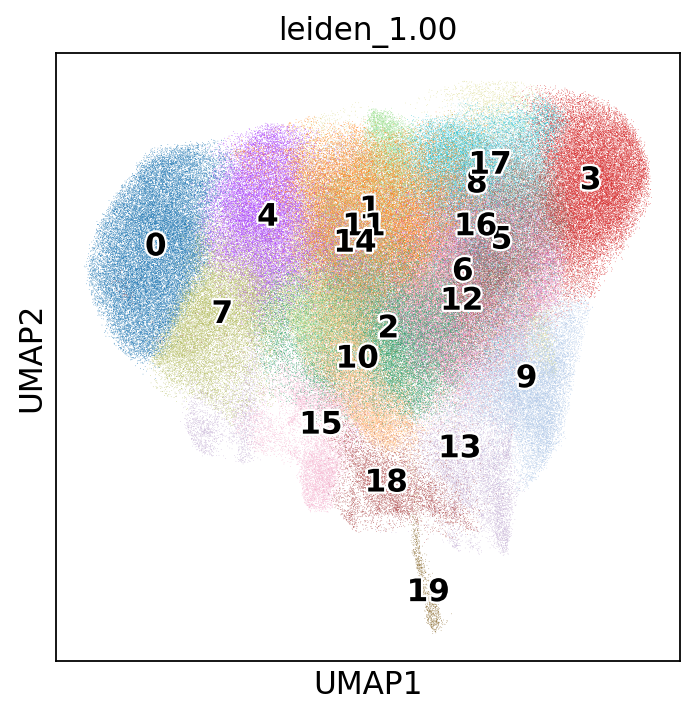

In [28]:
sc.pl.umap(adata_t, color="leiden_1.00", legend_loc="on data", legend_fontoutline=2)

In [ ]:
cell_type_map = {
    "NK cell": []
}

## Stromal cell subclustering

In [22]:
adata_stromal = sc.read_h5ad(f"{input_dir}/adata_t_cell.umap_leiden.h5ad")

In [25]:
adata_stromal.obs

sample  \
001C_AAACCTGTCACAGTAC-0   Adams_Kaminski_2020_COPD_001C   
001C_AAATGCCAGATCCCGC-0   Adams_Kaminski_2020_COPD_001C   
001C_AACTCCCGTTTGGCGC-0   Adams_Kaminski_2020_COPD_001C   
001C_AAGGTTCTCGTTGACA-0   Adams_Kaminski_2020_COPD_001C   
001C_AATCCAGCAGTCAGCC-0   Adams_Kaminski_2020_COPD_001C   
...                                                 ...   
bcAWRQ_25-21             Zilionis_Klein_2019_NSCLC_p3t3   
bcATMY_25-21             Zilionis_Klein_2019_NSCLC_p3t3   
bcFFZA_25-21             Zilionis_Klein_2019_NSCLC_p3t3   
bcBOGU_25-21             Zilionis_Klein_2019_NSCLC_p3t3   
bcBDLT_25-21             Zilionis_Klein_2019_NSCLC_p3t3   

                                                     patient tissue  \
001C_AAACCTGTCACAGTAC-0        Adams_Kaminski_2020_COPD_001C   lung   
001C_AAATGCCAGATCCCGC-0        Adams_Kaminski_2020_COPD_001C   lung   
001C_AACTCCCGTTTGGCGC-0        Adams_Kaminski_2020_COPD_001C   lung   
001C_AAGGTTCTCGTTGACA-0        Adams_Kaminski_2020_COPD_001C   lung   
001C_AATCCAGCAGTCAGCC-0        Adams_Kaminski_2020_COPD_001C   lung   
...                                                      ...    ...   
bcAWRQ_25-21             Zilionis_Klein_2019_NSCLC_patient_3   lung   
bcATMY_25-21             Zilionis_Klein_2019_NSCLC_patient_3   lung   
bcFFZA_25-21             Zilionis_Klein_2019_NSCLC_patient_3   lung   
bcBOGU_25-21             Zilionis_Klein_2019_NSCLC_patient_3   lung   
bcBDLT_25-21             Zilionis_Klein_2019_NSCLC_patient_3   lung   

                                origin        condition  \
001C_AAACCTGTCACAGTAC-0         normal  healthy_control   
001C_AAATGCCAGATCCCGC-0         normal  healthy_control   
001C_AACTCCCGTTTGGCGC-0         normal  healthy_control   
001C_AAGGTTCTCGTTGACA-0         normal  healthy_control   
001C_AATCCAGCAGTCAGCC-0         normal  healthy_control   
...                                ...              ...   
bcAWRQ_25-21             tumor_primary             LUAD   
bcATMY_25-21             tumor_primary             LUAD   
bcFFZA_25-21             tumor_primary             LUAD   
bcBOGU_25-21             tumor_primary             LUAD   
bcBDLT_25-21             tumor_primary             LUAD   

                                           dataset     sex cell_type  \
001C_AAACCTGTCACAGTAC-0   Adams_Kaminski_2020_COPD     nan    T cell   
001C_AAATGCCAGATCCCGC-0   Adams_Kaminski_2020_COPD     nan    T cell   
001C_AACTCCCGTTTGGCGC-0   Adams_Kaminski_2020_COPD     nan    T cell   
001C_AAGGTTCTCGTTGACA-0   Adams_Kaminski_2020_COPD     nan    T cell   
001C_AATCCAGCAGTCAGCC-0   Adams_Kaminski_2020_COPD     nan    T cell   
...                                            ...     ...       ...   
bcAWRQ_25-21             Zilionis_Klein_2019_NSCLC  female    T cell   
bcATMY_25-21             Zilionis_Klein_2019_NSCLC  female    T cell   
bcFFZA_25-21             Zilionis_Klein_2019_NSCLC  female    T cell   
bcBOGU_25-21             Zilionis_Klein_2019_NSCLC  female    T cell   
bcBDLT_25-21             Zilionis_Klein_2019_NSCLC  female    T cell   

                                                  batch  _scvi_batch  \
001C_AAACCTGTCACAGTAC-0   Adams_Kaminski_2020_COPD_001C            0   
001C_AAATGCCAGATCCCGC-0   Adams_Kaminski_2020_COPD_001C            0   
001C_AACTCCCGTTTGGCGC-0   Adams_Kaminski_2020_COPD_001C            0   
001C_AAGGTTCTCGTTGACA-0   Adams_Kaminski_2020_COPD_001C            0   
001C_AATCCAGCAGTCAGCC-0   Adams_Kaminski_2020_COPD_001C            0   
...                                                 ...          ...   
bcAWRQ_25-21             Zilionis_Klein_2019_NSCLC_p3t3          495   
bcATMY_25-21             Zilionis_Klein_2019_NSCLC_p3t3          495   
bcFFZA_25-21             Zilionis_Klein_2019_NSCLC_p3t3          495   
bcBOGU_25-21             Zilionis_Klein_2019_NSCLC_p3t3          495   
bcBDLT_25-21             Zilionis_Klein_2019_NSCLC_p3t3          495   

                         _scvi_labels  _scvi_loc